In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "D:\Datasets/train",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 25000 images belonging to 2 classes.


In [6]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "D:/Datasets/test1",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 50 images belonging to 2 classes.


In [7]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

from tensorflow.keras.regularizers import l2

In [9]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))
cnn.summary()

cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

r=cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

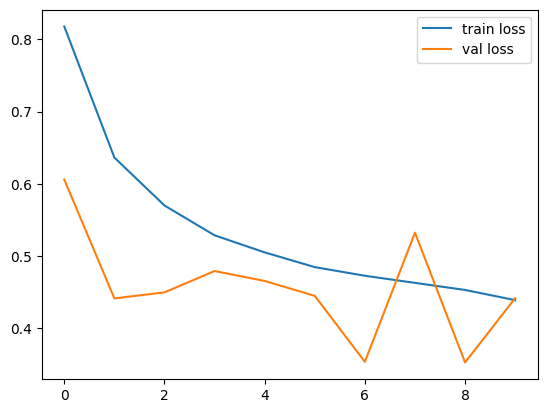

In [10]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

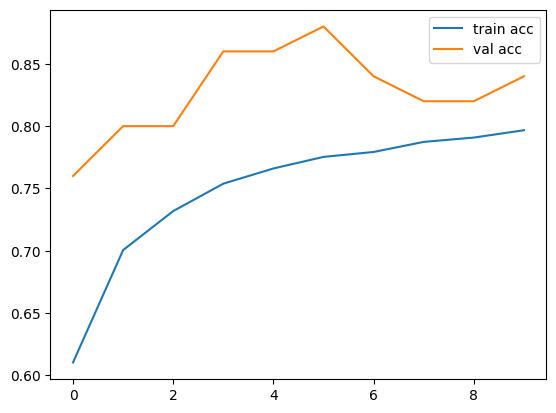

In [11]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [13]:
from tensorflow.keras.models import load_model

cnn.save('D:/Datasets/SVMmodel')

INFO:tensorflow:Assets written to: D:/Datasets/SVMmodel\assets


INFO:tensorflow:Assets written to: D:/Datasets/SVMmodel\assets


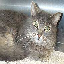

1/1 [==============================] - 0s 147ms/step
The image classified is cat


In [17]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('D:/Datasets/test1/7.jpg', target_size = (64,64))
display(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")